In [1]:
url<-"https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [2]:
data<-read.csv(url,header=FALSE)
head(data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [3]:
colnames(data)<-c(
  "age",
  "sex",
  "cp",
  "trestbbps",
  "chol",
  "fbs",
  "restecg",
  "thalach",
  "exang",
  "oldpeak",
  "slope",
  "ca",
  "thal",
  "hd")

In [4]:
head(data)

,age,sex,cp,trestbbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [5]:
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age      : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex      : num  1 1 1 1 0 1 0 0 1 1 ...
 $ cp       : num  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol     : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs      : num  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg  : num  2 2 2 0 2 0 2 0 2 2 ...
 $ thalach  : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang    : num  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak  : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope    : num  3 2 2 3 1 1 3 1 2 3 ...
 $ ca       : chr  "0.0" "3.0" "2.0" "0.0" ...
 $ thal     : chr  "6.0" "3.0" "7.0" "3.0" ...
 $ hd       : int  0 2 1 0 0 0 3 0 2 1 ...


In [6]:
data[data=="?"]<-NA

In [7]:
data[data$sex==0,]$sex<-"F"
data[data$sex==1,]$sex<-"M"
data$sex<-as.factor(data$sex)

In [8]:
data$cp<-as.factor(data$cp)
data$fbs<-as.factor(data$fbs)
data$restecg<-as.factor(data$restecg)
data$exang<-as.factor(data$exang)
data$slope<-as.factor(data$slope)
data$ca<-as.integer(data$ca)
data$ca<-as.factor(data$ca)
data$thal<-as.integer(data$thal)
data$thal<-as.factor(data$thal)
data$hd<-ifelse(test=data$hd==0,yes="Healthy",no="Unhealthy")
data$hd<-as.factor(data$hd)

In [9]:
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age      : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex      : Factor w/ 2 levels "F","M": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp       : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol     : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs      : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restecg  : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ thalach  : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang    : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak  : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope    : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ ca       : Factor w/ 4 levels "0","1","2","3": 1 4 3 1 1 1 3 1 2 1 ...
 $ thal     : Factor w/ 3 levels "3","6","7": 2 1 3 1 1 1 1 1 3 3 ...
 $ hd       : Factor w/ 2 levels "Healthy","Unhealthy": 1 2 2 1 1 1 2 1 2 2 ...


In [10]:
nrow(data[is.na(data$ca)|is.na(data$thal),])

[1] 6

In [11]:
data[is.na(data$ca)|is.na(data$thal),]

,age,sex,cp,trestbbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
88,53,F,3,128,216,0,2,115,0,0.0,1,0,NA,Healthy
167,52,M,3,138,223,0,0,169,0,0.0,1,NA,3,Healthy
193,43,M,4,132,247,1,2,143,1,0.1,2,NA,7,Unhealthy
267,52,M,4,128,204,1,0,156,1,1.0,2,0,NA,Unhealthy
288,58,M,2,125,220,0,0,144,0,0.4,2,NA,7,Healthy
303,38,M,3,138,175,0,0,173,0,0.0,1,NA,3,Healthy


In [12]:
data<-data[!(is.na(data$ca)|is.na(data$thal)),]
nrow(data)

[1] 297

In [13]:
logistic<-glm(hd~.,data=data,family="binomial")

In [14]:
summary(logistic)


Call:
glm(formula = hd ~ ., family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0490  -0.4847  -0.1213   0.3039   2.9086  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.253978   2.960399  -2.113 0.034640 *  
age         -0.023508   0.025122  -0.936 0.349402    
sexM         1.670152   0.552486   3.023 0.002503 ** 
cp2          1.448396   0.809136   1.790 0.073446 .  
cp3          0.393353   0.700338   0.562 0.574347    
cp4          2.373287   0.709094   3.347 0.000817 ***
trestbbps    0.027720   0.011748   2.359 0.018300 *  
chol         0.004445   0.004091   1.087 0.277253    
fbs1        -0.574079   0.592539  -0.969 0.332622    
restecg1     1.000887   2.638393   0.379 0.704424    
restecg2     0.486408   0.396327   1.227 0.219713    
thalach     -0.019695   0.011717  -1.681 0.092781 .  
exang1       0.653306   0.447445   1.460 0.144267    
oldpeak      0.390679   0.239173   1.633 0.102373   

In [15]:
predicted.data<-data.frame(
  probability.of.hd=logistic$fitted.values,
  hd=data$hd)

In [16]:
predicted.data<-predicted.data[
  order(predicted.data$probability.of.hd,decreasing=FALSE),
  ]
predicted.data$rank<-1:nrow(predicted.data)

In [17]:
library(ggplot2)

Saving 6.67 x 6.67 in image


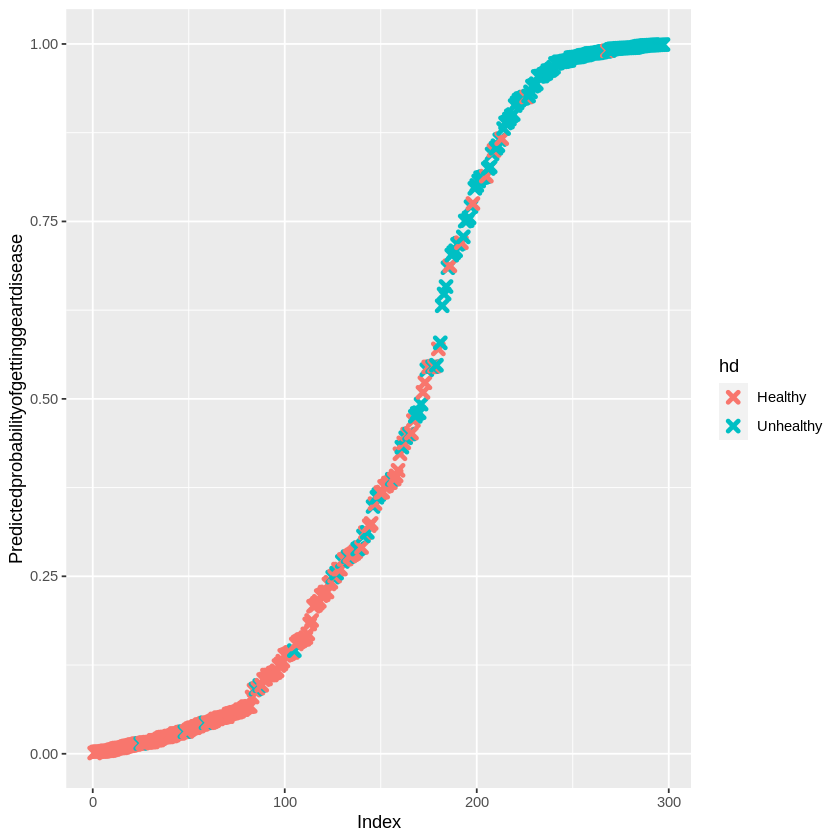

In [18]:
ggplot(data=predicted.data,aes(x=rank,y=probability.of.hd))+
  geom_point(aes(color=hd),alpha=1,shape=4,stroke=2)+
  xlab("Index")+
  ylab("Predictedprobabilityofgettinggeartdisease")